<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/PROJETO_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [144]:
df=pd.read_csv('/content/accidental-deaths-in-usa-monthly.csv',sep=',',index_col=0, parse_dates=True)

In [145]:
df.head()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
Month,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


In [115]:
!pip install scipy

In [116]:
!pip install pmdarima

In [146]:
from pmdarima.arima import auto_arima

In [147]:
from xgboost import XGBRegressor

In [148]:
df.shape

(72, 1)

In [149]:
df.describe()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [150]:
df.index.min(), df.index.max()

(Timestamp('1973-01-01 00:00:00'), Timestamp('1978-12-01 00:00:00'))

In [151]:
df.columns= {'produccion'}

<Axes: xlabel='Month'>

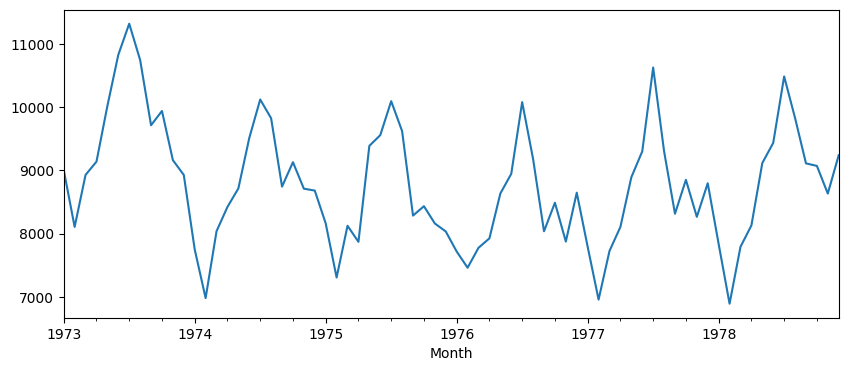

In [152]:
df.produccion.plot(figsize=(10,4))

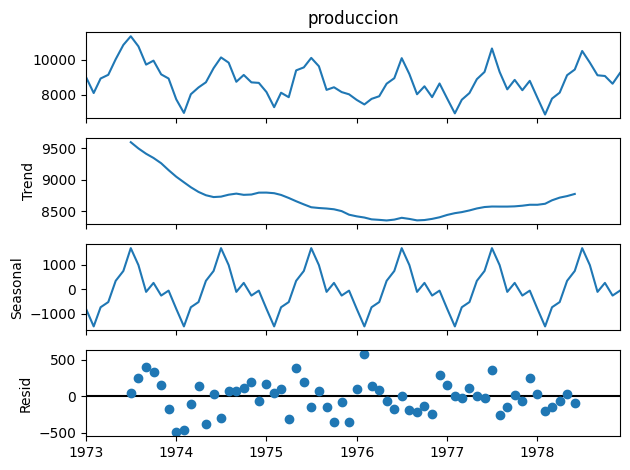

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado= seasonal_decompose(df.produccion)
fig= resultado.plot()

In [154]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['produccion'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.555798409635678
p-value: 0.10248122056865133


In [155]:
df.head()

,produccion
Month,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


In [156]:
df.diff().head()
#la funcion diff toma el valor del dia actual y lo substrae del anterior dia y asi se obtiene los valores abajo

,produccion
Month,
1973-01-01,NaN
1973-02-01,-901.0
1973-03-01,822.0
1973-04-01,209.0
1973-05-01,880.0


In [157]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['produccion'].diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.4322568576612698
p-value: 0.13283831957070796


In [158]:
fit_arima= auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=True,
                      M=6,
                      D=1,
                      Start_p=1,
                      Star_q=1,
                      max_P=2,
                      max_Q=2,
                      information_criterion='aic',
                      trace=True,
                      error_action='ignore',
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=857.047, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=873.981, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=860.819, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=853.234, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=865.055, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=855.155, Time=0.51 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=855.125, Time=0.84 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=857.696, Time=0.25 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=855.125, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=855.084, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=855.458, Time=0.27 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=85

In [159]:
#encima vemos los mejores resultados p q y d (que seria 1 1 1) y lo usamos abajo
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(df, order=(0,1,1), seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [160]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                             produccion   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -501.209
Date:                                Wed, 19 Jun 2024   AIC                           1012.419
Time:                                        19:03:54   BIC                           1023.291
Sample:                                    01-01-1973   HQIC                          1016.708
                                         - 12-01-1978                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2140      0.096     -2.219      0.026      -0.403      -0.025
ar.S.L6       -0.9988      0.013    -79.471      0.000      -1.023      -0.974
ma.S.L6       -0.0494      0.480     -0.103      0.918      -0.989       0.890
ma.S.L12      -0.9438      0.170     -5.537      0.000      -1.278      -0.610
sigma2      9.031e+04    5.3e-06   1.71e+10      0.000    9.03e+04    9.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               223.03
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+25. Standard errors may be unstable.
"""

In [161]:
predicciones= resultado_sarimax.get_prediction(start=-12)
prediccion_media= predicciones.predicted_mean

In [162]:
intervalo_confianza= predicciones.conf_int()
limite_abajo= intervalo_confianza.iloc[:,0]
limite_arriba= intervalo_confianza.iloc[:,1]

limite_abajo[0], limite_arriba[0]

(7598.1074024455165, 8874.593653987167)

In [163]:
prediccion_media[0]

8236.350528216342

In [164]:
fechas_pronostico=np.asarray(prediccion_media.index)
datas =np.asarray(df.index)

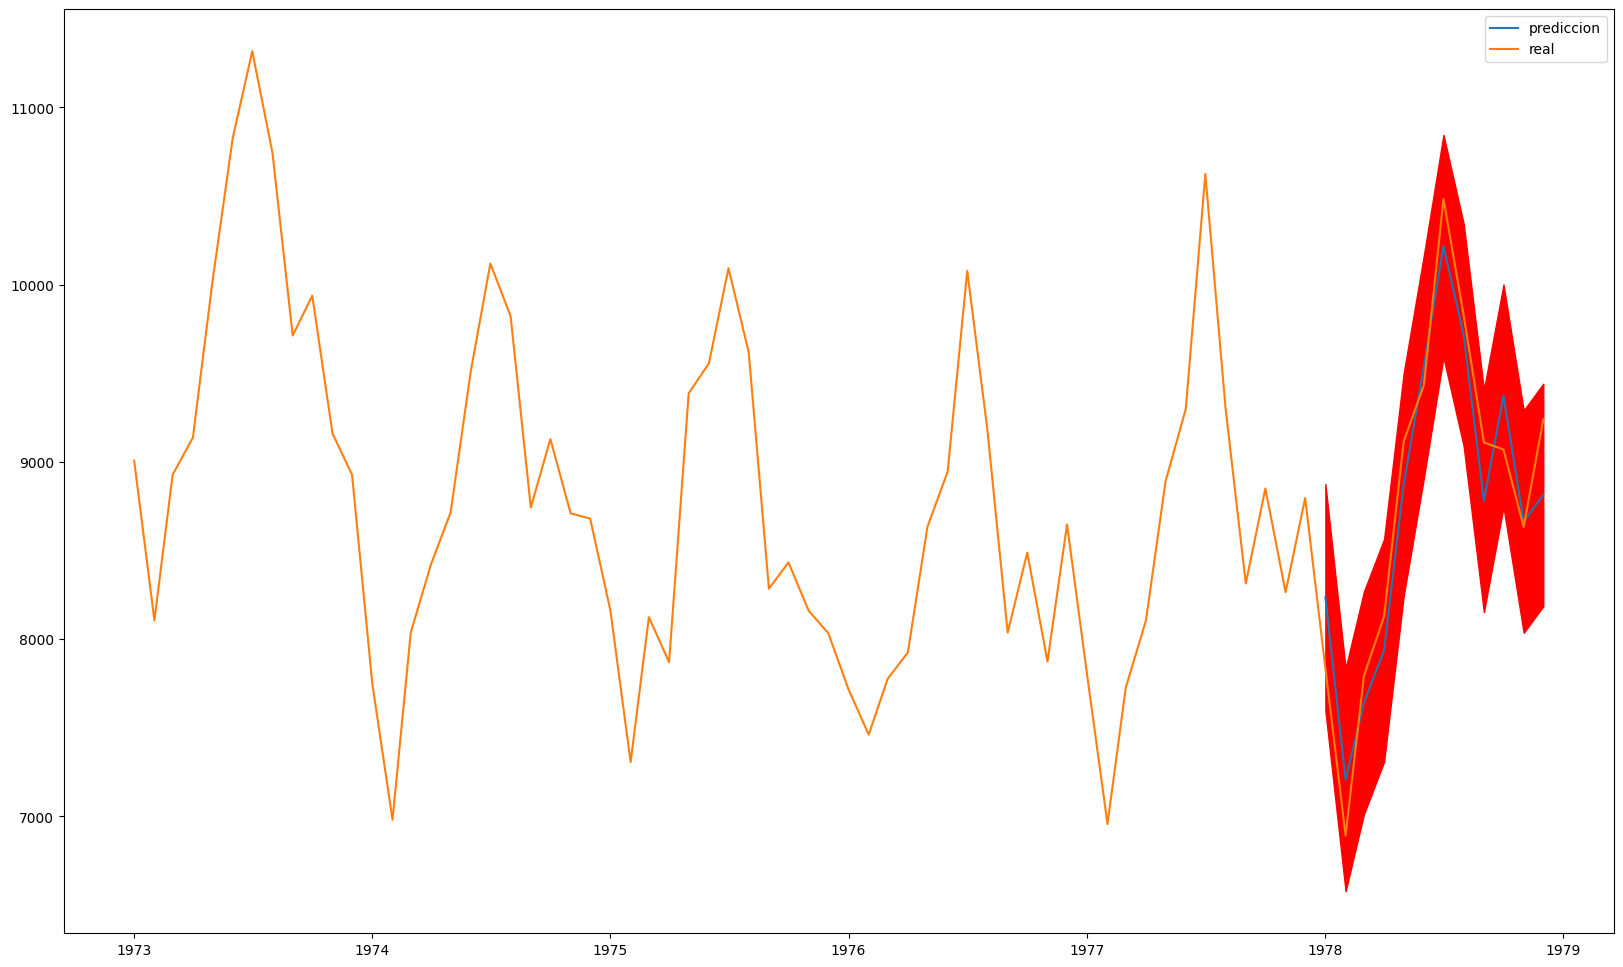

In [165]:
plt.figure(figsize=(20,12))
plt.plot(fechas_pronostico,prediccion_media,label='prediccion')
plt.fill_between(fechas_pronostico,limite_abajo,limite_arriba,color= 'red')
plt.plot(datas,df.values,label='real')
plt.legend()
plt.show()

In [166]:
from sklearn.metrics import mean_absolute_error

mae= mean_absolute_error(df[-12:].values,prediccion_media.values)

print(mae)

239.49189838825646


In [167]:
forecast= resultado_sarimax.get_forecast(steps=12)
forecast_medio=forecast.predicted_mean
forecast_medio.size

12

In [168]:
intervalo_confianza_forecast= forecast.conf_int()
intervalo_abajo_f= intervalo_confianza_forecast.iloc[:,0]
intervalo_arriba_f= intervalo_confianza_forecast.iloc[:,1]

intervalo_abajo_f[10], intervalo_arriba_f[10]

(7298.336147353975, 10620.33901277196)

In [169]:
forecast_medio[10]

8959.337580062967

In [170]:
fechas_forecast=  np.asarray(forecast_medio.index)
pred_dates= np.asarray(prediccion_media.index)

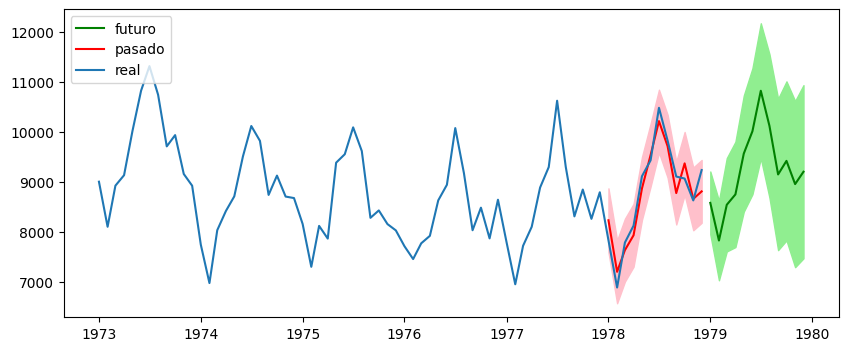

In [171]:
dates= np.asarray(df.index)
plt.figure(figsize=(10,4))
plt.plot(fechas_forecast,forecast_medio.values, color='green', label='futuro')
plt.fill_between(fechas_forecast,intervalo_abajo_f,intervalo_arriba_f,color= 'lightgreen')


plt.plot(fechas_pronostico,prediccion_media.values,color='red',label='pasado')
plt.fill_between(fechas_pronostico,limite_abajo,limite_arriba,color= 'pink')

plt.plot(dates,df.values,label='real')
plt.legend(loc='upper left')
plt.show()